## Table of Contents

In [4]:
import pandas as pd # data analysis
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data_viz
import seaborn as sns # data_viz
import scipy.stats as stats

### Config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,cross_validate
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

### Feature Selection
### Filtering
from sklearn.feature_selection import chi2,f_classif,f_regression,mutual_info_classif,mutual_info_regression,RFE,SelectFromModel,SelectKBest,SelectPercentile
from scipy.stats import chi2_contingency
### Wrapper 

from sklearn.feature_selection import RFE


### pipeline
from sklearn.pipeline import Pipeline

## Feature Selection
from sklearn.feature_selection import chi2,f_regression,f_classif,mutual_info_classif,mutual_info_regression,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,SelectFromModel


### Machine Learning Model

### Tree Based Algorithms

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,VotingRegressor
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

### Linear Algoritms

from sklearn.svm import SVC,SVR

from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet

### Metrics ###
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,f1_score,\
r2_score,mean_absolute_error,mean_squared_error

## Others
## Warning
import warnings
warnings.filterwarnings('ignore')

### Saving Model
import pickle

<a id=3></a>
### 3. Data Preprocessing

In [5]:
df = pd.read_csv('datasets\churn_analyzed.csv')

In [6]:
df.head(2) # Reading Our Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0


In [7]:
df.columns = [i.upper() for i in df.columns]

In [8]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


### Missing Values

In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [10]:
missing_data(df)

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
Percent,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.156,0.000
Types,object,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,int64


In [11]:
df.isnull().sum()

CUSTOMERID           0
GENDER               0
SENIORCITIZEN        0
PARTNER              0
DEPENDENTS           0
TENURE               0
PHONESERVICE         0
MULTIPLELINES        0
INTERNETSERVICE      0
ONLINESECURITY       0
ONLINEBACKUP         0
DEVICEPROTECTION     0
TECHSUPPORT          0
STREAMINGTV          0
STREAMINGMOVIES      0
CONTRACT             0
PAPERLESSBILLING     0
PAYMENTMETHOD        0
MONTHLYCHARGES       0
TOTALCHARGES        11
CHURN                0
dtype: int64

#### Dropping NA Values

In [12]:
df.dropna(axis=0,inplace=True)

### Outliers

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [14]:
cat_cols,num_cols,cat_but_car = grab_col_names(df,cat_th=10,car_th=20)

Observations: 7032
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 2


In [15]:
def outlier_plot(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

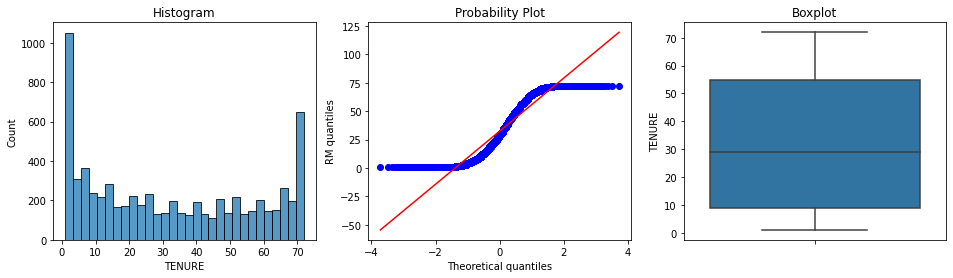

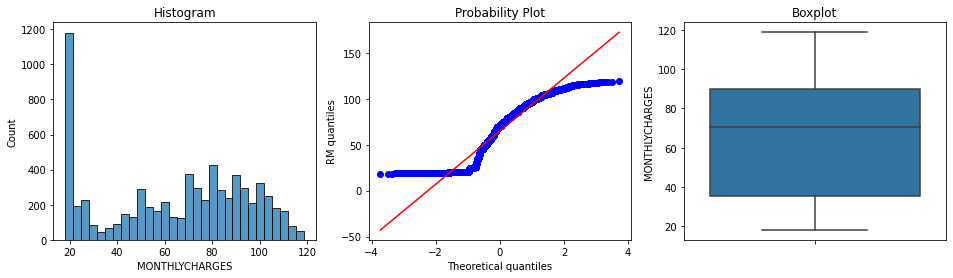

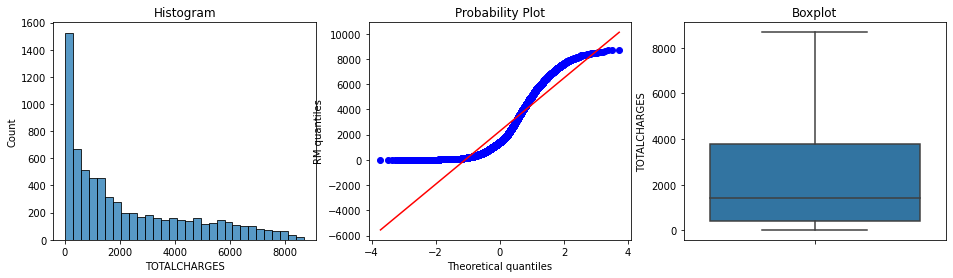

In [16]:
for i in num_cols:
    outlier_plot(df,i)

- As we can see above we don't have any outliers 

### Baseline Model

In [17]:
X = df.copy()
y =X.pop('CHURN')
X = pd.get_dummies(X)

In [18]:
models = [('LR',LogisticRegression() ),
                  ('CART', DecisionTreeClassifier(random_state=1)),
                  ('RF', RandomForestClassifier(random_state=1)),
                  ('SVC', SVC(random_state=1)),
                  ('GBM', GradientBoostingClassifier(random_state=1)),
                  ("LightGBM", LGBMClassifier(random_state=1)),
                  ('XGBoost', XGBClassifier(random_state=1,eval_metric='logloss'))]

for name, classifier in models:
    cv_results = cross_validate(classifier, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
    accuracy = cv_results['test_accuracy'].mean()
    f1_score =cv_results['test_f1'].mean()
    roc_auc_score = cv_results['test_roc_auc'].mean() 
    print(f'  {name}:Accuracy: {round(accuracy,3)}, F1_Score: {round(f1_score,3)}, Roc_auc_score:{round(roc_auc_score,3)}')

  LR:Accuracy: 0.801, F1_Score: 0.595, Roc_auc_score:0.844
  CART:Accuracy: 0.767, F1_Score: 0.532, Roc_auc_score:0.681
  RF:Accuracy: 0.794, F1_Score: 0.543, Roc_auc_score:0.828
  SVC:Accuracy: 0.734, F1_Score: 0.0, Roc_auc_score:0.792
  GBM:Accuracy: 0.805, F1_Score: 0.58, Roc_auc_score:0.848
  LightGBM:Accuracy: 0.793, F1_Score: 0.576, Roc_auc_score:0.835
  XGBoost:Accuracy: 0.788, F1_Score: 0.567, Roc_auc_score:0.823


- We see that Logistic Regression and Gradient Boosting Machine are performing better

### Feature Engineering  ( Creating New Features )

In [19]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [20]:
df["NEW_AVG_CHARGES"] = df["TOTALCHARGES"] / (df["TENURE"] + 1)

In [21]:
df['NEW_AUTOMATIC_PAYMENT'] = df['PAYMENTMETHOD'].apply(lambda x: 1 if x in ['Bank transfer (automatic)','Credit card (automatic)'] else 0 )

In [22]:
df['NEW_TENURE_YEAR'] = df['TENURE']//12

In [23]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_AVG_CHARGES,NEW_AUTOMATIC_PAYMENT,NEW_TENURE_YEAR
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,14.925,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,53.986,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,36.050,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.016,1,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,50.550,0,0


In [25]:
df.to_csv('datasets\preprocessed.csv',index=False)